## Build a model which will predict the profit that a startup company can have when Administraiton amount, R&D spend amount, Marlketting amount along with the state of the organization is specified

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Collect data and perform EDA

In [2]:
data=pd.read_csv('../DataAnalysis/Datasets/50_Startups.csv')


In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.shape

(50, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x2ac34676490>,
 'caps': [<matplotlib.lines.Line2D at 0x2ac34676710>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ac3459e350>],
 'medians': [<matplotlib.lines.Line2D at 0x2ac34676990>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ac34676ad0>],
 'means': []}

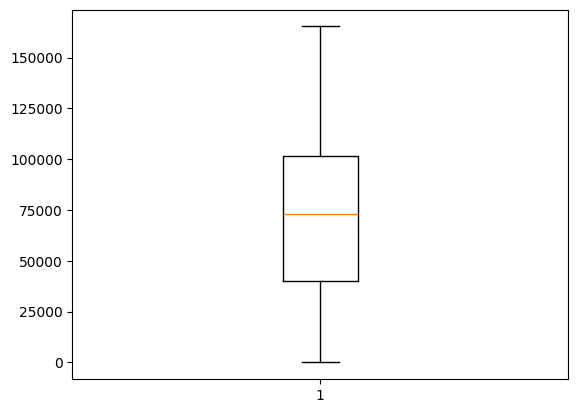

In [6]:
plt.boxplot(data[['R&D Spend']])

In [7]:
data['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [8]:
data=pd.get_dummies(data,columns=['State'],dtype='int')

In [9]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [10]:
X=data.drop('Profit',axis=1) # Dropped profit because we have to find ouput for input i.e. profit is output and other are input
y=data['Profit'] 

In [11]:
# X.head()

In [12]:
# y.head()

## Split Data in training and testing

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=34)

## Build Model

In [15]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [16]:
test_predict=lr.predict(X_test)

## Check accuracy

In [17]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error

In [18]:
r2_score(y_test,test_predict)

0.9642233845164812

In [19]:
## training accuracy


## Deploy Model

In [20]:
coeff=lr.coef_
coeff

array([ 8.03243222e-01, -9.93798709e-02,  9.90287759e-03, -4.89481166e+02,
        1.89432369e+02,  3.00048797e+02])

In [21]:
intercept=lr.intercept_
intercept

np.float64(62591.7065416335)

In [22]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [23]:
r=156000
a=123000
m=550000
state={'California':0,'Florida':0,'New York':0}
s='Florida'
state[s]=1

In [24]:
# Creating line equation
profit = intercept + coeff[0]* r + coeff[1] * a + coeff[2] * m + coeff[3] *state['California']
+coeff[4] * state['Florida'] + coeff[5] *state['New York']
print("Predicted Profit",profit)

Predicted Profit 181120.50766428758


In [25]:
#use predict method
# lr.predict([[r,a,m,state['California'], state['Florida'],state['New York']]])
lr.predict([[r,a,m,state['California'], state['Florida'],state['New York']]])

C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([181309.94003353])